# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various **customers' annual spending amounts** (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [16]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)

    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe(percentiles=[.02,.05, .25, .5, .75, .95, .98]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
2%,134.940000,336.120000,524.100000,72.020000,23.900000,21.120000
5%,401.900000,593.750000,851.450000,136.850000,63.700000,63.950000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
95%,36818.500000,16843.400000,24033.500000,9930.750000,12043.200000,4485.400000


In [174]:
# indices for max, min values for each feature
maxMinIndices=list()

for feature in list(data):
    minIndex = data.index.values[data[feature]==data[feature].min()]
    maxIndex = data.index.values[data[feature]==data[feature].max()] 
    maxMinIndices = maxMinIndices + minIndex.tolist() + maxIndex.tolist()
   

print (list(set(maxMinIndices)))
maxMinsamples = pd.DataFrame(data.loc[maxMinIndices], columns = data.keys())
display(maxMinsamples)

[128L, 161L, 420L, 325L, 75L, 109L, 142L, 338L, 181L, 86L, 183L, 154L, 187L, 85L, 95L]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
338,3,333,7021,15601,15,550
95,3,2920,6252,440,223,709
181,112151,29627,18148,16745,4948,8550
154,622,55,137,75,7,8
86,22925,73498,32114,987,20070,903
75,20398,1137,3,4407,3,975
85,16117,46197,92780,1026,40827,2944
420,4456,5266,13227,25,6818,1393
325,32717,16784,13626,60869,1272,5609
75,20398,1137,3,4407,3,975


In [291]:
# indices for median values for each feature

indexListMedian=list()
indexList25=list()
indexList75=list()

for feature in list(data):
    data.sort_values([feature], inplace = True)
    
    indexMedian = data.index.values[data[feature] > data[feature].median()][0]
    index25 = data.index.values[data[feature] > np.percentile(data[feature],25)][0]
    index75 = data.index.values[data[feature] > np.percentile(data[feature],75)][0]
                     
    indexListMedian.append(indexMedian)
    indexList25.append(index25)
    indexList75.append(index75)
    
samplesMedian = pd.DataFrame(data.loc[indexListMedian], columns = data.keys())
samples25 = pd.DataFrame(data.loc[indexList25], columns = data.keys())
samples75 = pd.DataFrame(data.loc[indexList75], columns = data.keys())

print()
print("Indices for feature Medians")
display(samplesMedian)
print("Indices for feature 25 percentile")
display(samples25)
print("Indices for feature 75 percentile")
display(samples75)

Indices for feature Medians


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
431,8533,5506,5160,13486,1377,1498
409,8708,3634,6100,2349,2123,5137
40,24025,4332,4757,9510,1145,5864
411,2126,3289,3281,1535,235,4365
31,2612,4339,3133,2088,820,985
386,1206,3620,2857,1945,353,967


Indices for feature 25 percentile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
376,3136,8630,13586,5641,4666,1426
66,9,1534,7417,175,3468,27
169,5414,717,2155,2399,69,750
53,491,10473,11532,744,5611,224
308,6987,1020,3007,416,257,656
192,5509,1461,2251,547,187,409


Indices for feature 75 percentile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
190,16936,6250,1981,7332,118,64
196,30624,7209,4897,18711,763,2876
127,21465,7243,10685,880,2386,2749
330,9790,1786,5109,3570,182,1043
213,3317,6602,6861,1329,3961,1215
273,36817,3045,1493,4802,210,1824


In [287]:
display(data.describe(percentiles=[.25, .5, .75]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [290]:
# TODO: Select three indices of your choice you wish to sample from the dataset

import matplotlib.pyplot as plt

indices = [66, 330, 376]

#data.hist(range=(0,30000), figsize = (15,8))

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9,1534,7417,175,3468,27
1,9790,1786,5109,3570,182,1043
2,3136,8630,13586,5641,4666,1426


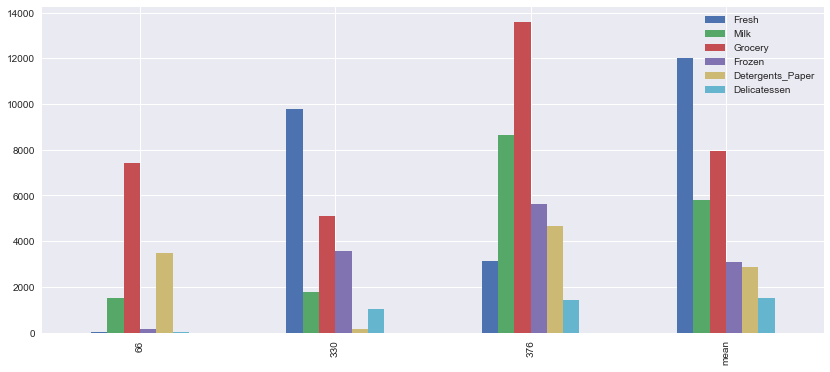

In [289]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 

The 3 sample points below were chosen based on the median, 25 percentile and 75 percentile values for each feature. 
- point 376: Milk, Grocery and Detergents_Paper are over the 75 percentile, Fresh is at the 25 percentile
- point  66: Milk, Grocery are at or below the 25 percentile, Detergents_Paper is above the mean
- point 330: Frozen is at the 75 percentile, Grocery and Detergents_Paper are below the 25 percentile

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [243]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

print list(data)
new_data = data.drop(['Grocery'], axis = 1)
print list(new_data)
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.predict(X_test) 
print 'r^2 score= ', metrics.r2_score(y_test, score)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen']
r^2 score=  0.816973901318


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** 'Frozen' gave me a negative R^2, hence model fails, and this feature is needed for preidctions. Grocery on the other hand gives me an R^2=0.82, hence it is possible to predict it.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\Al\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


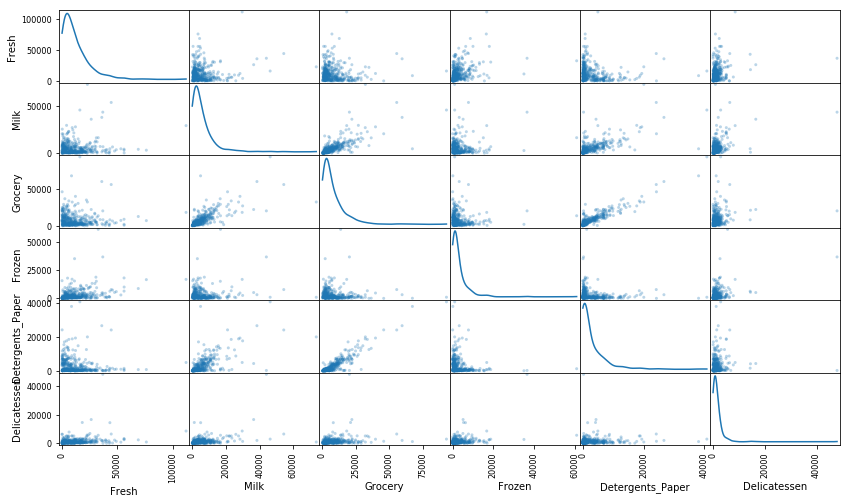

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** There is some degree of correlation betweem the 3 features: Milk, Grocery and Detergnets_Paper. Their distributions approximate a straight lines. Hence all 3 pairs: Milk-Grocery, Milk-Detergents_paper and Grocery-Detergents_Paper are somewhat correlated. This corroborates Gorcery from the previous part showing a R2 socre of: 0.82. The other features don't appear correlated, and are scattered around zero, they also don't appear to be normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\Al\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


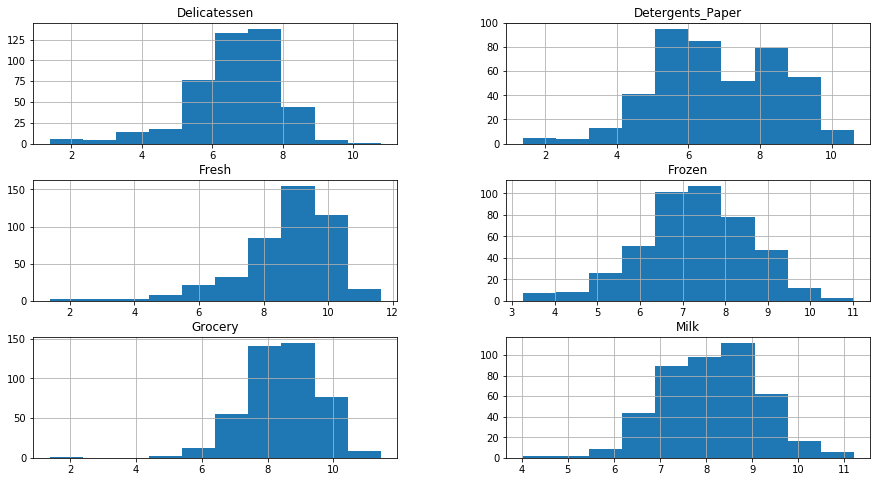

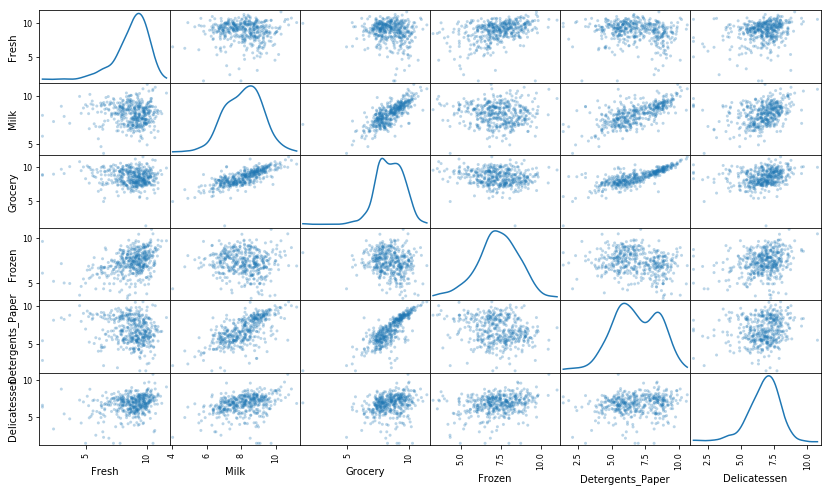

In [244]:
import matplotlib.pyplot as pl

features_log_transformed = data.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
features_log_transformed.hist( figsize = (15,8))

# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [ ]:
The pairs of correlated features seem more strongly correlated after logarithmic scaling. 

In [231]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
1,11.627610,10.296475,9.806371,9.725915,8.506941,9.053804
2,1.386294,5.811141,8.856803,9.655154,2.772589,6.311735


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [353]:
# For each feature find the data points with extreme high or low values

from collections import Counter

# list of all outliers for all features that are to be removed
allOutliers=list()
duplicates=list()

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
     
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)

    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    # take all indices and concat here inside the for loop
    featureOutlier = log_data.index.values[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # convert ndarray to list for concatenation with list of all outliers 
    allOutliers = allOutliers + featureOutlier.tolist()

# detecting duplicates in a list and displaying them
duplicates = [k for k,v in Counter(allOutliers).items() if v>1]
print "The indices for duplicate outliers are: '{}'".format(duplicates)

# OPTIONAL: Select the indices for data points you wish to remove
# after removing duplicates from the list
outliers  = duplicates # list(set(allOutliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print (good_data.shape)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
412,4.584967,8.190354,9.425532,4.595120,7.996654,4.143135
357,3.637586,7.151485,10.011130,4.927254,8.817001,4.709530
355,5.252273,6.590301,7.607381,5.505332,5.220356,4.852030
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
305,5.497168,9.468079,9.088512,6.684612,8.271293,5.356586
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
338,1.386294,5.811141,8.856803,9.655154,2.772589,6.311735
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
233,6.872128,8.514189,8.106816,6.843750,6.016157,2.079442
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
285,10.602989,6.463029,8.188967,6.949856,6.079933,2.944439
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439
289,10.663990,5.659482,6.156979,7.236339,3.496508,3.135494


The indices for duplicate outliers are: '[128L, 154L, 65L, 66L, 75L]'
(435, 6)


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** Yes, I already handled duplicate outliers in the previous question and got rid of them by converting the list of all outliers to a set and then back to a list. I then removed all outliers and ended up with 398 rows from 440. Outliers in general should be removed, becuase we want the model to perform well for the typical or common data. Outliers would bias the model for a small number of uncommon data. The only situation I can think of where I would keep otuliers is when they represent some event failure that we're trying to detect. I did find data that were outliers in multiple categories, those were the duplicates in my complete outlier list. I removed them like any of the outliers. Outliers are outliers! This is specially important for k-means since it's sensitive to outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover **which dimensions about the data best maximize the variance of features involved.** In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — **how much variance within the data is explained by that dimension alone.** Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

(3L, 6L)
[ 0.44385298  0.27721202  0.11495081  0.09552157  0.04578243  0.02268019]
[ 0.17544493 -0.39795466 -0.45421966  0.17160006 -0.74385916 -0.14752165]
[-0.68562493 -0.16486944 -0.07226079 -0.4914428  -0.04276992 -0.50415238]


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4439,0.1754,-0.3980,-0.4542,0.1716,-0.7439,-0.1475
Dimension 2,0.7211,-0.5102,-0.5629,-0.5265,-0.3198,-0.7867,-0.6517
Dimension 3,0.8361,-1.1898,-0.5267,-0.5565,-0.0015,-0.9984,-0.0274
Dimension 4,0.9316,-1.3808,-0.5198,-0.4906,0.7900,-0.7975,-0.5680
Dimension 5,0.9774,-1.3834,0.1998,-0.1430,0.7587,-1.3623,-0.7713
Dimension 6,1.0001,-1.4119,0.7431,-0.9569,0.7455,-1.1605,-0.7978


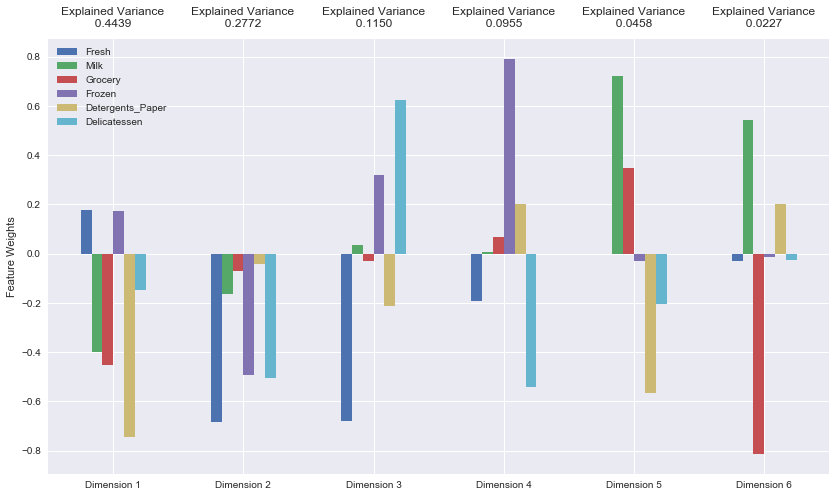

In [354]:
from sklearn import decomposition

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features

pca = decomposition.PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

print pca_samples.shape
print pca.explained_variance_ratio_
print pca.components_[0]
print pca.components_[1]

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
pca_results.cumsum()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** 
72% of the variance in the data are explained by the 1st and 2nd princinpal components, and 93% by the 1st 4. For my own interest I tried PCA that inludes outliers, and got 86% and 87% for 1st 2 and 1st 4 components respectively.

Each principal component has its main feature variences as described below:
- Component 1: strong negative variance with Detergents_Paper, Milk and Groceries, this could represent a retail store
- Component 2: strong negative variance with Fresh, Frozen and Delicatessen, this could represent a restaurant
- Component 3: strong negative variance with Fresh, strong positive variance with Delicatessen, this could represent a cafe
- Component 4: strong negative variance with Delicatessen, strong positive variance with Frozen, this could represent a frozen food market.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [355]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3276,-1.9483,-0.7543,-0.1957,0.5072,-0.2963
1,-2.1779,-4.9062,-0.0389,0.5328,0.5031,0.2441
2,2.8995,4.5860,6.2667,2.6698,0.7696,-2.2115


Answer: Looking at the 1st 4 dimensions, it is conisstent with my initial interpretation in the sense that the sample points have different values for those 4 dimensions.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the **cumulative explained variance ratio** is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [356]:
# TODO: Apply PCA by fitting the good data with only two dimensions
 
pca = decomposition.PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [357]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3276,-1.9483
1,-2.1779,-4.9062
2,2.8995,4.5860


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

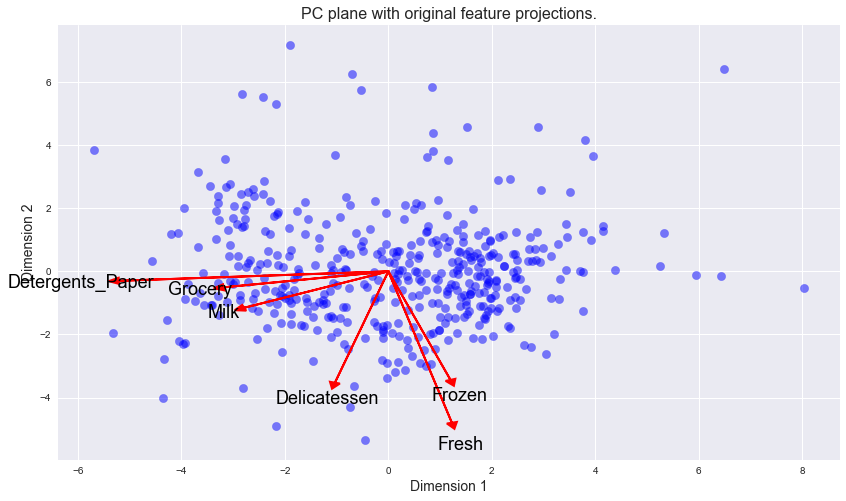

In [358]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


### Answer
Detergent_paper, Milk and Grocery seem to most stronly correlate with Dimension 1 and Delicatessen, Frozen and Fresh to Dimension 2.
This does agree with the pca_results plot from above. If we consider the absolute values of the feature weights,  
Detergent_paper, Milk and Grocery have the largest weights in Dimension 1,
and Delicatessen, Frozen and Fresh have the largest weights in Dimension 2.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** K-means is useful when we are certain that all points belong to one or another particular cluster. Guassian Mixture uses soft clustering and can handle situations when we are not certain that all points belong to only one cluster. Some points may belong to several clusters, and the degree to which they belong to each cluster is expressed probabilistically. K-means however has the advantages that efficient interms of computatinal cost, easy to implement and easy to interpret the clustering results.

For our purposes we want to classify customers into groups so that we know the level of service required for each group. Hence soft clustering is not needed and K-means would be there more practical algorithm to use. 

Refernces:
https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [359]:
# trying different cluster numbers to find the optimum number

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print "Silhouette Scores for the following number of clusters"
for clusters in range(2,5):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=clusters, random_state=0).fit(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    labels = clusterer.labels_
    score = silhouette_score(reduced_data, labels)
    
    print "{} clusters: {}".format(clusters, score)

Silhouette Scores for the following number of clusters
2 clusters: 0.419627020236
3 clusters: 0.392653443295
4 clusters: 0.33352466403


In [360]:
# Kmeans clustering using 2 clusters

from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** Based on the above results, using 2 Clusters has the highest Silhouette score and hence would be best for this application.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

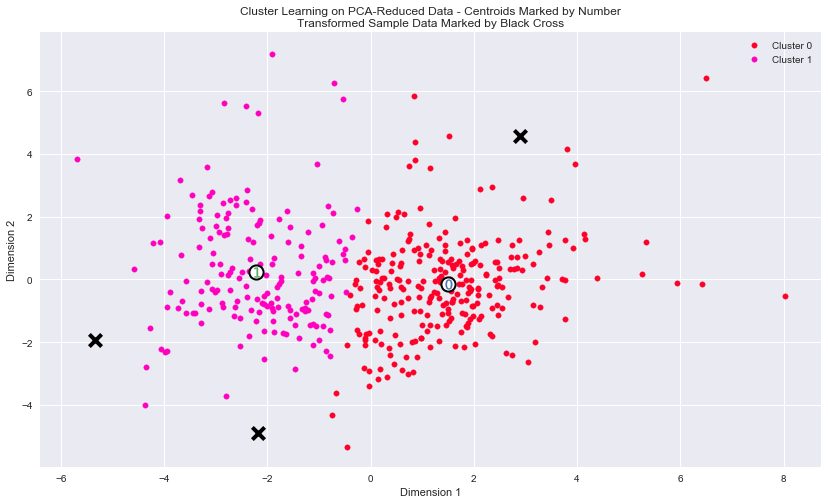

In [361]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [362]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe(percentiles=[.25, .5, .75]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8995.0,1902.0,2385.0,2071.0,294.0,692.0
Segment 1,3561.0,7846.0,12589.0,899.0,4613.0,980.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** 
- Seg 0: Detergent_Paper and Grocery are very High since they are above the 75 percentile of their respective distributions, Fresh and Frozen are Low since they are well below the mean but not below the 25 percentile level. This could correspond to establishments such as restaurants.
- Seg 1: Detergent_Paper and Grocery are very Low, below the 25 percentile. Fresh and Frozen on the other hand are above the mean. This could be a small supermarket or frozen food market.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [363]:
# Display the predictions

print sample_preds

for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

[1 1 0]
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**  
- sample 0, fits cluster 0 due to it's Detergents_Paper being above the mean, and Frozen being below the mean.
- sample 1, fits cluster 1 due to it's Detergents_Paper being below the 25 percentile and Grocery being belwo the mean.
- sample 2, fits cluster 0 due to it's Detergents_Paper being above the 75 percentile and Fresh being near the 25 percentile.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** If Fresh, Milk and Groceries were in the same segment it would have been easy, I'd test 3 days a week with the other segment that doesn't have these 'fresh' items. Milk and Grecories I believe last about a week, but Fresh usually lasts a day and hence is the determining factor. So I'd experiment by changing half of cluster 1 customer's schedule, and keep half the same as my A/B test and see what their reaction is.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Perhaps a classification algorithm could be used such as k-nearest or svm, etc. The algorithm would be trained using the new estimated spending data in each feature, and the target variable would be the feature values of the 2 segments derived above in Q7.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

[128L, 154L, 65L, 66L, 75L]


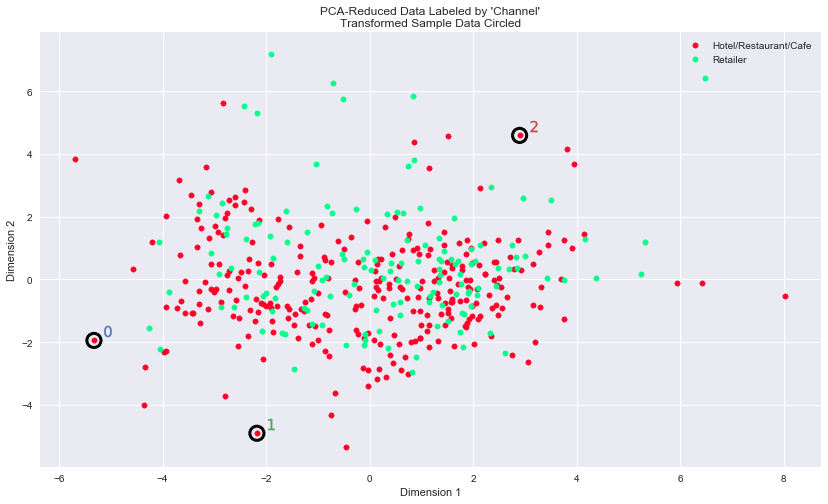

In [364]:
# Display the clustering results based on 'Channel' data

print outliers

vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** Given the the new features, the clustering does not work at all! These are totally inconsistent with the clusters! The reason for this is unknown at this point!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.